In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
from PIL import Image

# https://github.com/keon/3-min-pytorch/blob/master/06-%EC%82%AC%EB%9E%8C%EC%9D%98_%EC%A7%80%EB%8F%84_%EC%97%86%EC%9D%B4_%ED%95%99%EC%8A%B5%ED%95%98%EB%8A%94_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94/denoising_autoencoder.py
# https://learnopencv.com/understanding-autoencoders-using-tensorflow-python/

In [2]:
def clahe(img, clip_limit=4.0, tile_grid_size=(3, 3)):
    # if img.dtype != np.uint8:
    #     raise TypeError("ahe supports only uint8 inputs")

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    if len(img.shape) == 2:
        img = clahe.apply(img)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        img[:, :, 0] = clahe.apply(img[:, :, 0])
        img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

    return img

In [4]:
train = pd.read_csv('./data/old_data/train.csv')

In [5]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)

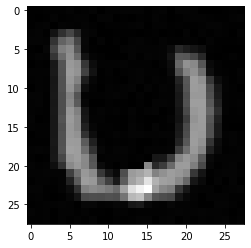

In [13]:
idx = np.random.randint(x_train.shape[0])
img = x_train[idx]
plt.imshow(np.squeeze(img), 'gray')
plt.show()

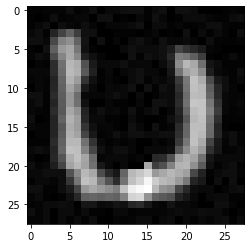

In [14]:
cimg = clahe(np.squeeze(img).astype(np.uint8))
plt.imshow(cimg, 'gray')

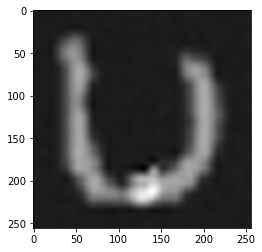

In [15]:
dst = cv2.resize(img.astype('float32'), dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
plt.imshow(dst, 'gray')
plt.show()

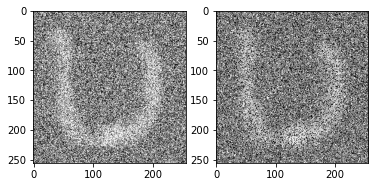

In [16]:
from PIL import Image
import numpy as np
from skimage.util import random_noise
# https://github.com/scikit-image/scikit-image/blob/master/skimage/util/noise.py

# im = Image.open("tt.png")
# # convert PIL Image to ndarray
# im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image

gaussian_noise = random_noise(dst / 255, mode='gaussian', var=0.5, seed=777)
snp_noise = random_noise(dst / 255, mode='s&p', seed=777, amount=0.35, salt_vs_pepper=0.4)

plt.subplot(1, 2, 1)
plt.imshow(gaussian_noise, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(snp_noise, 'gray')
plt.show()

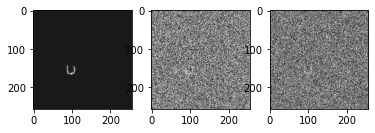

In [17]:
dmy = np.zeros(shape=(256,256))

scale = np.random.rand() * 5+ 0.5
dsize = (int(img.shape[0] * scale), int(img.shape[1] * scale))
scaled_img = cv2.resize(img.astype('float32'), dsize=dsize, interpolation=cv2.INTER_CUBIC)

x = np.random.randint(0, dmy.shape[1] - dsize[1])
y = np.random.randint(0, dmy.shape[0] - dsize[0])

dmy[y:y+dsize[0], x:x+dsize[1]] = scaled_img

# plt.figure(figsize=(5,5))
# plt.imshow(dmy)
# plt.show()

gaussian_noise = random_noise(dmy / 255, mode='gaussian', var=0.5)
snp_noise = random_noise(dmy / 255, mode='s&p', amount=0.35, salt_vs_pepper=0.4)

plt.subplot(1, 3, 1)
plt.imshow(dmy, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(gaussian_noise, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(snp_noise, 'gray')
plt.show()

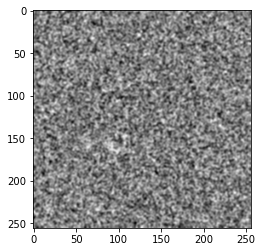

In [18]:
gaussiaan = cv2.GaussianBlur(gaussian_noise.astype(np.float32), (5, 5), 0)
plt.imshow(gaussiaan, 'gray')

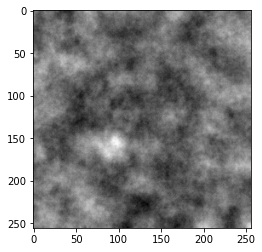

In [19]:
gaussiaan = cv2.bilateralFilter(gaussian_noise.astype(np.float32), 32, 35, 35)
plt.imshow(gaussiaan, 'gray')

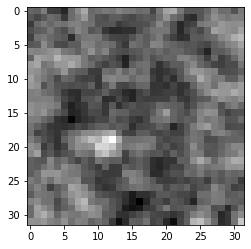

In [20]:
plt.imshow(cv2.resize(gaussiaan, dsize=(32,32)), 'gray')

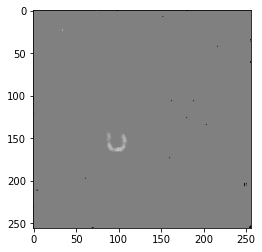

In [21]:
median = cv2.medianBlur(snp_noise.astype(np.float32), 5)
plt.imshow(median, 'gray')

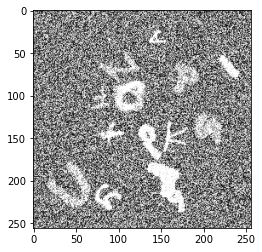

In [23]:
image = np.array(Image.open('./data/dirty_mnist_2nd/00000.png').convert('L'))
plt.imshow(image, 'gray')

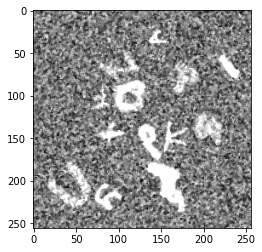

In [25]:
median = cv2.medianBlur(image.astype(np.float32), 3)
plt.imshow(median, 'gray')

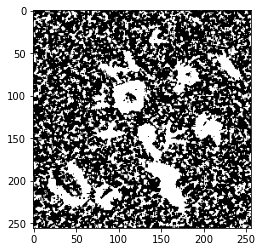

In [26]:
_, bin = cv2.threshold(median.astype(np.uint8), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(bin, 'gray')

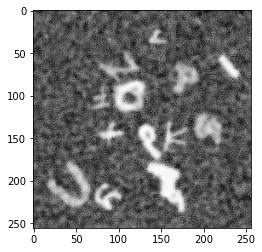

In [27]:
blur = cv2.bilateralFilter(image, 9, 150, 150)
plt.imshow(blur, 'gray')

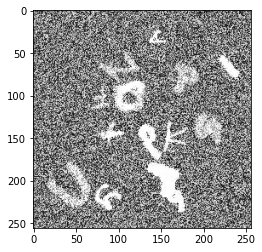

In [28]:
blur = cv2.bilateralFilter(image, 12, 30, 75)
plt.imshow(blur, 'gray')

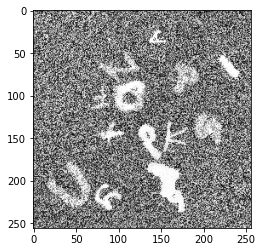

In [29]:
cimg = clahe((blur).astype(np.uint8))
plt.imshow(cimg, 'gray')